In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [34]:
df = pd.concat([pd.read_csv(f"dataset/{name}") for name in os.listdir("dataset")])
df.head()

,id,time,bpm,ax,ay,az,gx,gy,gz
0,1069120841,1676271507741,82.0,0.184354,6.533776,7.122750,-0.061087,-0.013439,0.003665
1,1069120841,1676271507795,82.0,0.256180,6.584054,7.139510,0.116064,0.014661,0.021991
2,1069120841,1676271507846,82.0,0.268151,6.694188,7.108385,-0.315206,-0.018326,-0.083078
3,1069120841,1676271507898,82.0,0.620098,6.629545,7.314286,0.012217,-0.101404,-0.043982
4,1069120841,1676271507950,82.0,0.356736,6.366182,7.271191,-0.239459,-0.021991,-0.068417


In [22]:
import pytz
import datetime

def ms_to_ts(ms: int) -> datetime.datetime:
    return datetime.datetime.fromtimestamp(ms / 1000.0, tz=pytz.timezone('Asia/Seoul'))

In [35]:
df["ts"] = df.time.map(ms_to_ts)

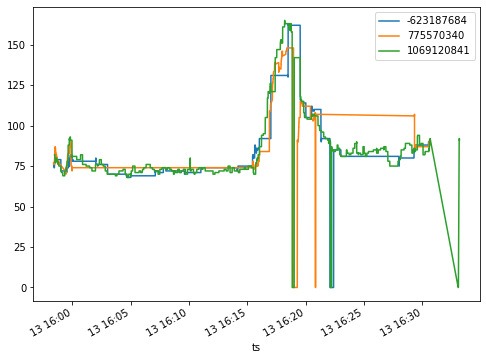

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
for label, subdf in df.groupby('id'):
    subdf.plot("ts", "bpm", ax=ax, label=label)
plt.legend()